In [3]:
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

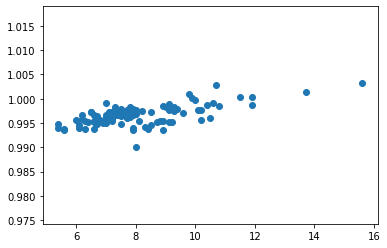

[[ 1.          0.60239429]
 [ 1.         -0.03598116]
 [ 1.          0.60239429]
 [ 1.          0.19615537]
 [ 1.         -0.67435661]
 [ 1.         -0.21008356]
 [ 1.          4.37461286]
 [ 1.         -0.44222008]
 [ 1.         -0.61632248]
 [ 1.         -0.50025422]
 [ 1.          1.18273561]
 [ 1.          1.99521345]
 [ 1.         -0.55828835]
 [ 1.          1.12470147]
 [ 1.          0.48632602]
 [ 1.         -0.09401529]
 [ 1.         -1.42880033]
 [ 1.         -1.0225614 ]
 [ 1.         -0.79042488]
 [ 1.          1.356838  ]
 [ 1.          0.2541895 ]
 [ 1.         -0.38418595]
 [ 1.         -1.0225614 ]
 [ 1.         -1.54486859]
 [ 1.          0.48632602]
 [ 1.          0.77649668]
 [ 1.         -0.32615182]
 [ 1.          2.22734998]
 [ 1.         -0.15204943]
 [ 1.         -0.38418595]
 [ 1.          1.58897453]
 [ 1.          1.24076974]
 [ 1.         -1.08059553]
 [ 1.         -0.21008356]
 [ 1.          3.27196435]
 [ 1.         -0.03598116]
 [ 1.         -0.79042488]
 

In [4]:
# load data
x = np.genfromtxt('ass1_data/data/q1/linearX.csv', delimiter=',')
y = np.genfromtxt('ass1_data/data/q1/linearY.csv', delimiter=',')

n = 1
m = np.size(y)

plt.scatter(x, y)
plt.show()

# normalize
x = x - x.mean()
x = x / x.std()


x = x.reshape((m, n))
x = np.hstack((np.ones((m, 1)), x)) # add intercept

y = y.reshape((m, 1))
print(x)
# print(y)

In [5]:
def hypothesis(theta, x):
    return np.matmul(theta.T, x)

def cost(theta):
    summation = 0
    for i in range(m):
        summation += (y[i] - hypothesis(theta, x[i]))**2
    return summation / (2 * m)

In [6]:
def gradient_descent(learning_rate, epsilon):
    t = 0
    theta = np.zeros((n+1, 1))
    prev_cost = cost(theta)
    thetas_and_costs = []
    thetas_and_costs.append((theta, prev_cost))
    
    while True:
#         print(t, theta)
        theta_t = theta.copy()
        
        for j in range(n+1):
            summation = 0
            for i in range(m):
                summation += (y[i] - hypothesis(theta_t, x[i])) * x[i][j]
            theta[j] = theta[j] + (learning_rate * summation)
            
        curr_cost = cost(theta)
        thetas_and_costs.append((theta, curr_cost))
        print(t, theta_t, prev_cost, curr_cost)
            
        if abs(curr_cost - prev_cost) < epsilon or t > 100000:
            return theta, thetas_and_costs
        prev_cost = curr_cost
        t += 1

In [7]:
theta, thetas_and_costs = gradient_descent(0.001, 1e-8)
print(thetas_and_costs)

0 [[0.]
 [0.]] [0.4966279] [0.40226883]
1 [[0.09966201]
 [0.00013402]] [0.40226883] [0.32583798]
2 [[0.18935782]
 [0.00025464]] [0.32583798] [0.26392899]
3 [[0.27008405]
 [0.00036319]] [0.26392899] [0.21378271]
4 [[0.34273765]
 [0.00046089]] [0.21378271] [0.17316422]
5 [[0.4081259 ]
 [0.00054882]] [0.17316422] [0.14026325]
6 [[0.46697532]
 [0.00062796]] [0.14026325] [0.11361346]
7 [[0.5199398 ]
 [0.00069918]] [0.11361346] [0.09202713]
8 [[0.56760783]
 [0.00076329]] [0.09202713] [0.0745422]
9 [[0.61050905]
 [0.00082098]] [0.0745422] [0.06037941]
10 [[0.64912016]
 [0.0008729 ]] [0.06037941] [0.04890755]
11 [[0.68387015]
 [0.00091963]] [0.04890755] [0.03961534]
12 [[0.71514515]
 [0.00096169]] [0.03961534] [0.03208865]
13 [[0.74329264]
 [0.00099954]] [0.03208865] [0.02599204]
14 [[0.76862539]
 [0.0010336 ]] [0.02599204] [0.02105378]
15 [[0.79142486]
 [0.00106426]] [0.02105378] [0.01705379]
16 [[0.81194438]
 [0.00109185]] [0.01705379] [0.01381379]
17 [[0.83041196]
 [0.00111669]] [0.01381379

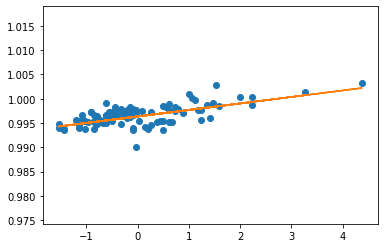

In [8]:
plt.scatter(x.T[1,:], y)
plt.plot(x.T[1,:], [hypothesis(theta, xi) for xi in x], 'C1')
plt.show()

[[0.99635129]
 [0.00133983]]


<Figure size 432x288 with 0 Axes>

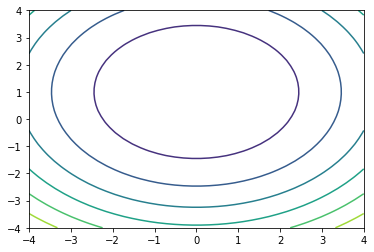

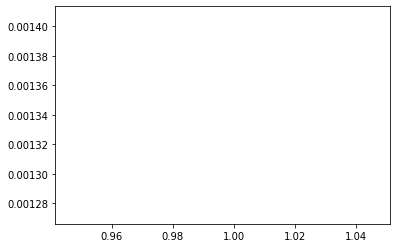

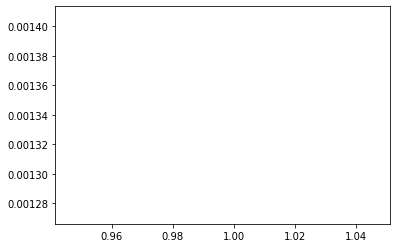

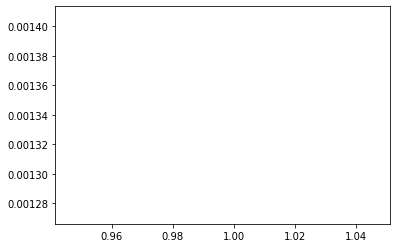

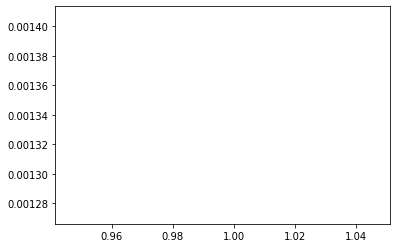

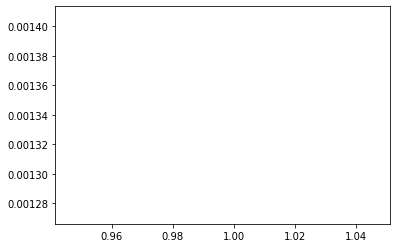

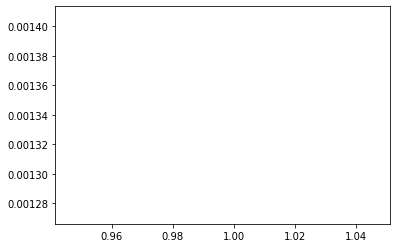

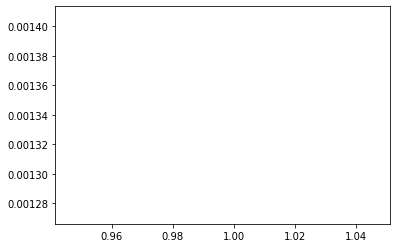

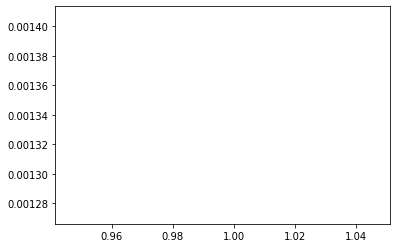

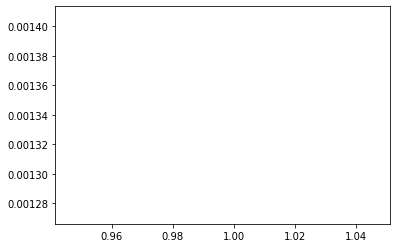

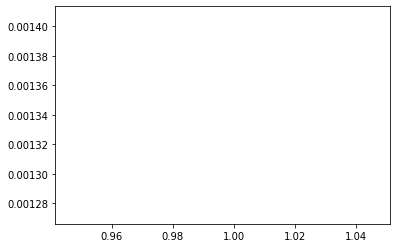

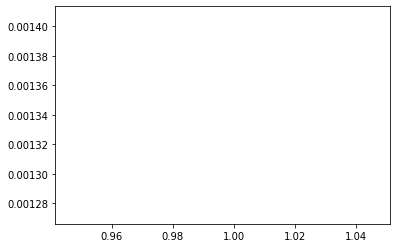

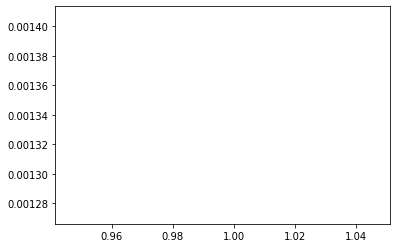

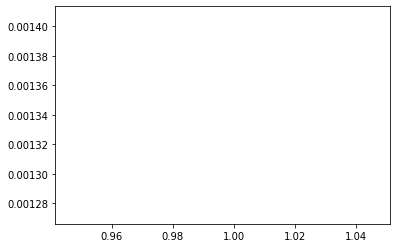

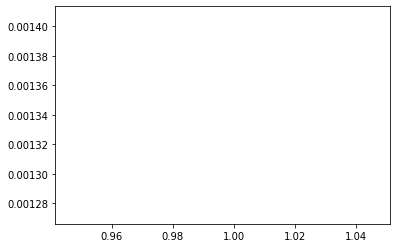

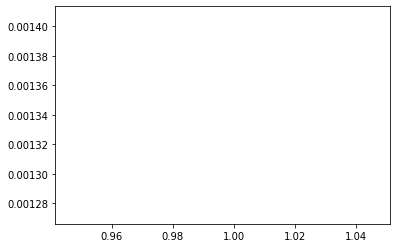

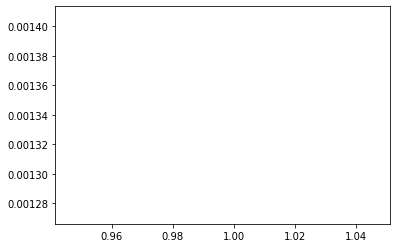

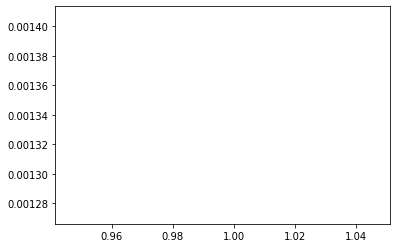

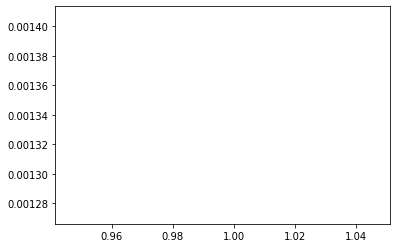

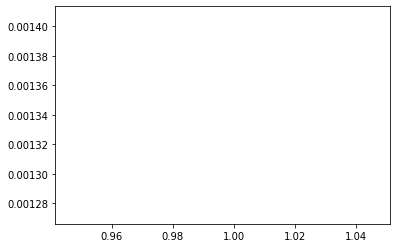

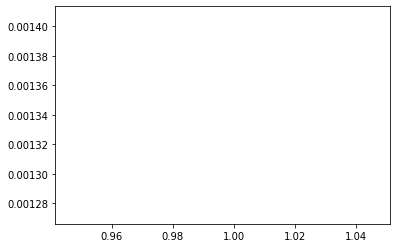

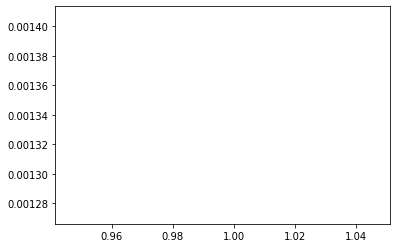

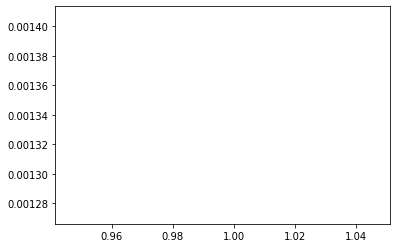

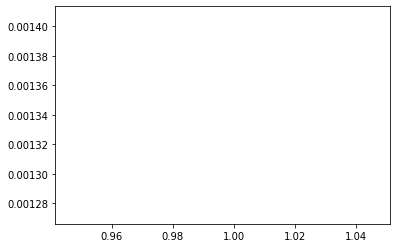

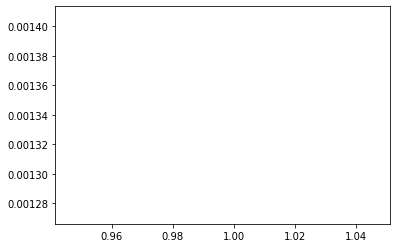

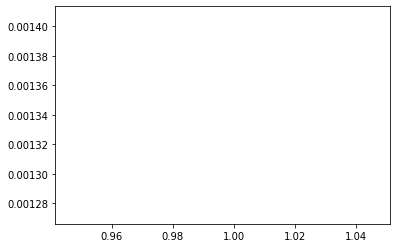

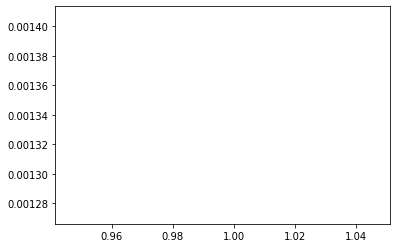

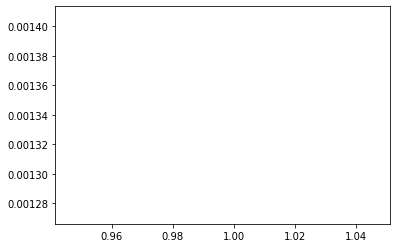

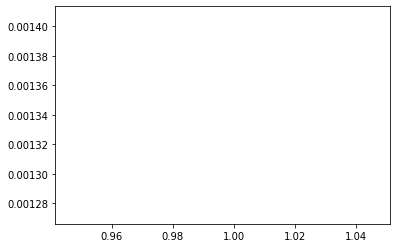

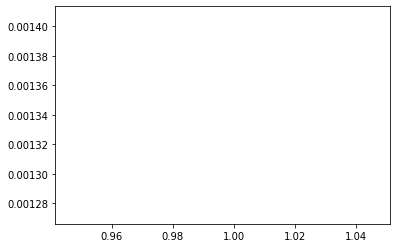

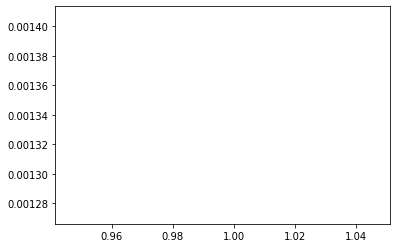

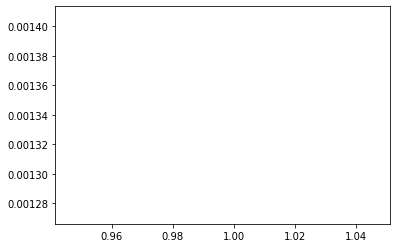

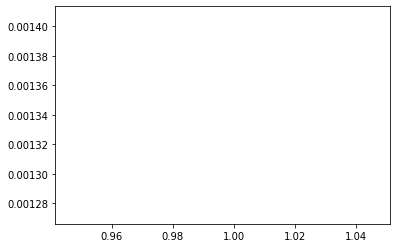

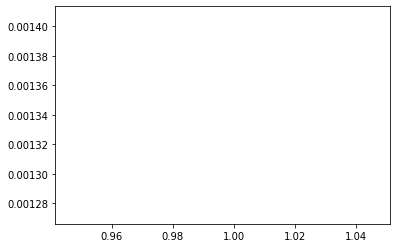

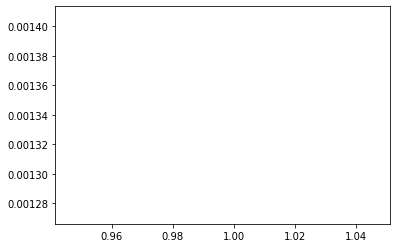

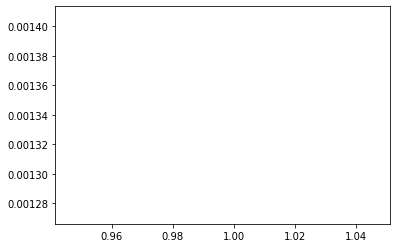

KeyboardInterrupt: 

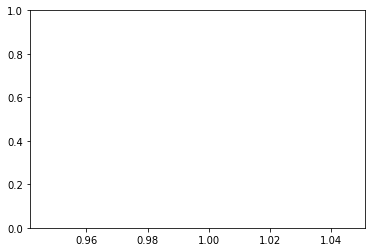

In [9]:
theta0 = np.linspace(-4, 4, 40)
theta1 = np.linspace(-4, 4, 40)

X, Y = np.meshgrid(theta0, theta1)
# Z = f(X, Y)
def f(theta0, theta1):
    theta = np.array([[theta0],
                        [theta1]])
    return cost(theta)


Z = f(X, Y)
Z = Z.reshape((40, 40))
fig = plt.figure()

# ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, Z, 50, cmap='binary')
fig, ax = plt.subplots(1, 1)
ax.contour(X, Y, Z)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
# plt.plot(theta[0], theta[1], markersize=50)
# plt.show()
# temp = np.linspace(0,1,20)
# ax.plot3D(temp, temp, temp, 'red')
print(theta)

x0 = []
x1 = []
for theta, cost in thetas_and_costs:
    x0.append(theta[0][0])
    x1.append(theta[1][0])
#     fig = plt.figure()

#     # ax = plt.axes(projection='3d')
#     # ax.contour3D(X, Y, Z, 50, cmap='binary')
#     fig, ax = plt.subplots(1, 1)
#     ax.contour(X, Y, Z)
    # ax.set_xlabel('x')
    # ax.set_ylabel('y')
    # ax.set_zlabel('z')
    plt.plot(x0, x1, markersize=50)
    plt.draw()
    plt.pause(0.2)
    

In [ ]:
import time

theta0 = np.linspace(-2, 4, 30)
theta1 = np.linspace(-2, 4, 30)

X, Y = np.meshgrid(theta0, theta1)
# Z = f(X, Y)
def f(theta0, theta1):
    theta = np.array([[theta0],
                        [theta1]])
    return cost(theta)


Z = f(X, Y)
Z = Z.reshape((30, 30))

fig = plt.figure()

ax = plt.axes(projection='3d')

for theta, cost in thetas_and_costs:
#     print(theta, cost)
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    temp = np.linspace(0,1,20)
    ax.scatter3D([theta[0]], [theta[1]], cost, 'red')
    plt.show()